In [1]:
import time
import numpy as np
import pandas as pd
from sklearn import metrics
import pycaret
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import sMAPE, smape_loss

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

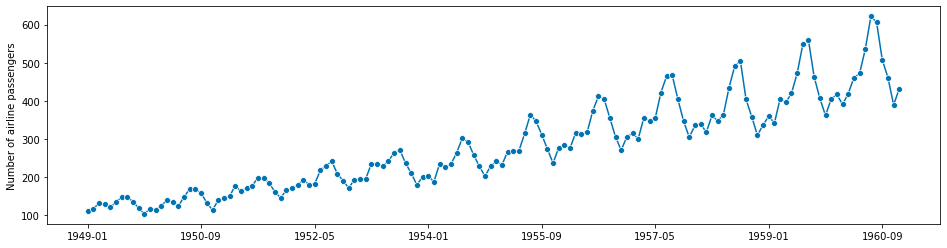

In [2]:
y = get_data('airline', verbose=False)
plot_series(y)

In [3]:
fh = np.arange(1,13)
fold = 3

# Available Models

In [4]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=12)
exp.models()

,Description,Value
0,session_id,5303
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


,Name,Reference,Turbo
ID,,,
naive,Naive Forcaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend.PolynomialTrendForeca...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
exp_smooth,ExponentialSmoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
auto_ets,AutoETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True
tbats,TBATS,sktime.forecasting.tbats.TBATS,False
bats,BATS,sktime.forecasting.bats.BATS,False
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,pycaret.containers.models.time_series.BaseCdsDt,True


# Flow example

## Common Setup

In [5]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, session_id=42)

,Description,Value
0,session_id,42
1,Original Data,"(144, 1)"
2,Missing Values,False
3,Transformed Train Set,"(132,)"
4,Transformed Test Set,"(12,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,CPU Jobs,-1
8,Use GPU,False
9,Log Experiment,False


In [6]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = exp.get_config("y_test")

## Manual Create

### Classical Statistical Models

,mae,rmse,mape,smape
0,14.5613,352.5322,0.0366,0.0376
1,15.5549,332.1290,0.0420,0.0411
2,20.2153,501.1830,0.0479,0.0494
Mean,16.7772,395.2814,0.0422,0.0427
SD,2.4647,75.3456,0.0046,0.0049


0.0216

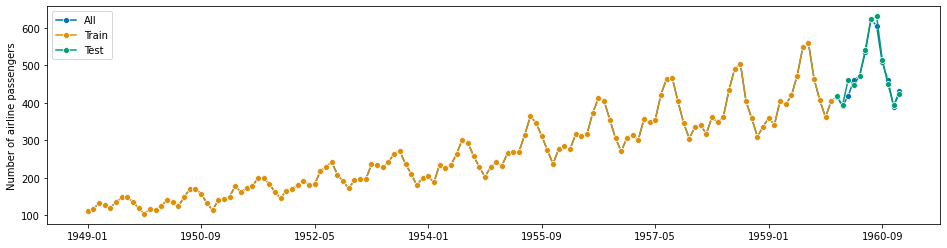

In [7]:
model = exp.create_model("exp_smooth")
y_predict = model.predict()
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

In [8]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,mae,rmse,mape,smape
0,10.5620,182.1899,0.0272,0.0273
1,26.2572,903.9130,0.0738,0.0704
2,11.2644,179.8604,0.0261,0.0265
Mean,16.0279,421.9878,0.0424,0.0414
SD,7.2389,340.7739,0.0222,0.0205


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='mul', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


In [9]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,mae,rmse,mape,smape
0,10.5620,182.1899,0.0272,0.0273
1,26.2572,903.9130,0.0738,0.0704
2,11.2644,179.8604,0.0261,0.0265
Mean,16.0279,421.9878,0.0424,0.0414
SD,7.2389,340.7739,0.0222,0.0205


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='mul', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


0.0364

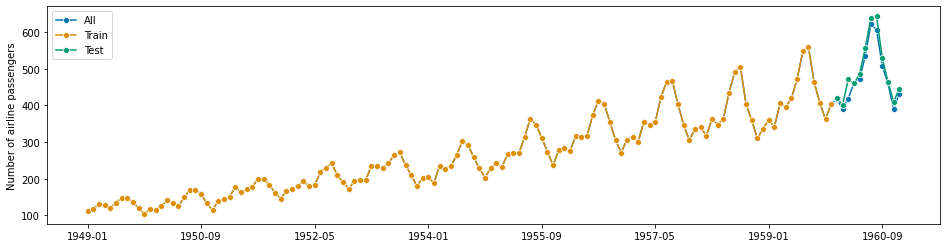

In [10]:
y_predict = tuned_model.predict()
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

In [11]:

# Random Grid Search with different number of iterations
tuned_model = exp.tune_model(model, search_algorithm="random", n_iter=5)
print(model)
print(tuned_model)

,mae,rmse,mape,smape
0,10.5620,182.1899,0.0272,0.0273
1,26.2572,903.9130,0.0738,0.0704
2,11.2644,179.8604,0.0261,0.0265
Mean,16.0279,421.9878,0.0424,0.0414
SD,7.2389,340.7739,0.0222,0.0205


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='mul', sp=12,
                     trend='add', use_boxcox=None)
ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)


### Reduced Regressors: Random Forest (with internal conditional deseasonalize and detrending)

,mae,rmse,mape,smape
0,28.0638,1611.5346,0.0678,0.0721
1,29.7063,1450.1777,0.0738,0.0748
2,22.8056,1290.5687,0.0470,0.0493
Mean,26.8586,1450.7603,0.0629,0.0654
SD,2.9433,131.0344,0.0115,0.0115


0.0637

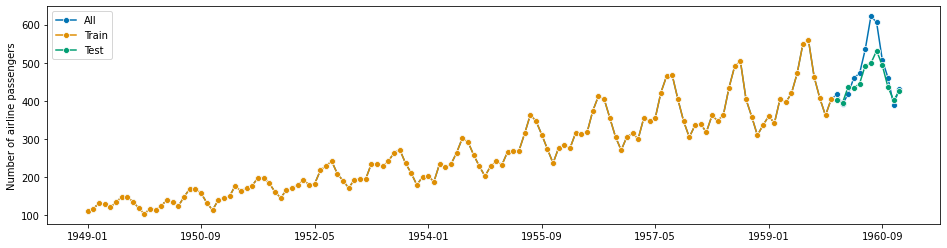

In [12]:
model = exp.create_model("rf_cds_dt")
y_predict = model.predict()
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

In [13]:
# Fixed Grid Search
tuned_model = exp.tune_model(model)
print(model)
print(tuned_model)

,mae,rmse,mape,smape
0,26.0565,1308.5808,0.0631,0.0667
1,21.7997,727.3647,0.0563,0.0559
2,18.9182,869.3599,0.0395,0.0409
Mean,22.2582,968.4351,0.0530,0.0545
SD,2.9322,247.4065,0.0099,0.0106


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=Rand

In [14]:
# Random Grid Search
tuned_model = exp.tune_model(model, search_algorithm="random")
print(model)
print(tuned_model)

,mae,rmse,mape,smape
0,20.1918,682.5538,0.0502,0.0521
1,18.5111,509.3313,0.0496,0.0482
2,18.1008,517.7899,0.0396,0.0405
Mean,18.9346,569.8917,0.0465,0.0470
SD,0.9046,79.7390,0.0049,0.0048


BaseCdsDt(degree=1, deseasonal_model='additive',
          regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                          criterion='mse', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=100, n_jobs=-1,
                                          oob_score=False, random_state=42,
                                          verbose=0, warm_start=False),
          sp=1, window_length=10)
BaseCdsDt(degree=1, deseasonal_model='multiplicative',
          regresso

0.0532

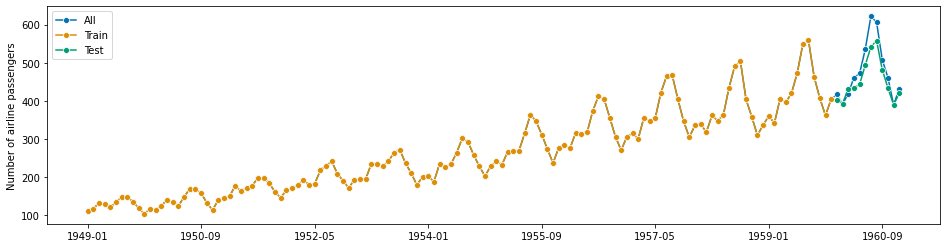

In [15]:
y_predict = tuned_model.predict()
plot_series(y, y_train, y_predict, labels=['All', 'Train', 'Test'])
round(smape_loss(y_predict, y_test), 4)

## Auto Create

### Compare Models

In [16]:
best_baseline_models = exp.compare_models(fold=fold, sort='smape', n_select=3)
best_baseline_models

,Model,mae,rmse,mape,smape,TT (Sec)
exp_smooth,ExponentialSmoothing,16.7772,395.2814,0.0422,0.0427,0.1467
auto_ets,AutoETS,17.4165,424.9896,0.0440,0.0445,0.1800
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.3200
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.5500
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,24.8102,1079.7144,0.0613,0.0631,0.5133
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.4767
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.5733
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.8200,1437.6933,0.0661,0.0686,0.1133
theta,Theta Forecaster,28.3192,1321.7502,0.0670,0.0700,0.0200
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,29.1314,1567.8077,0.0685,0.0715,0.0567


[ExponentialSmoothing(damped_trend=False, initial_level=None,
                      initial_seasonal=None, initial_trend=None,
                      initialization_method='estimated', seasonal='mul', sp=12,
                      trend='add', use_boxcox=None),
 AutoETS(additive_only=False, allow_multiplicative_trend=False, auto=False,
         bounds=None, callback=None, damped_trend=False, dates=None, disp=False,
         error='add', freq=None, full_output=True, information_criterion='aic',
         initial_level=None, initial_seasonal=None, initial_trend=None,
         initialization_method='estimated', maxiter=1000, missing='none',
         n_jobs=None, restrict=True, return_params=False, seasonal='mul', sp=12,
         start_params=None, trend='add'),
 ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True

In [17]:
compare_metrics = exp.pull()
compare_metrics

,Model,mae,rmse,mape,smape,TT (Sec)
exp_smooth,ExponentialSmoothing,16.7772,395.2814,0.0422,0.0427,0.1467
auto_ets,AutoETS,17.4165,424.9896,0.0440,0.0445,0.1800
arima,ARIMA,20.0069,528.2344,0.0501,0.0507,0.3200
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,24.4233,1017.0008,0.0584,0.0601,0.5500
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonali...,24.8102,1079.7144,0.0613,0.0631,0.5133
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,25.8293,1290.4445,0.0617,0.0641,0.4767
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,26.8586,1450.7603,0.0629,0.0654,0.5733
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,27.8200,1437.6933,0.0661,0.0686,0.1133
theta,Theta Forecaster,28.3192,1321.7502,0.0670,0.0700,0.0200
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,29.1314,1567.8077,0.0685,0.0715,0.0567


* Note that some models like BATS and TBATS are disabled by default. 
* You can enable them by setting `turbo = False`

In [18]:
# _ = exp.compare_models(fold=fold, sort='smape', n_select=3, turbo=False)

### Tune Best Models

In [19]:
# TBD (It does not tune multiple models at this time - why? Also should it be tune_model or tune_models?)
best_tuned_models = exp.tune_model(best_baseline_models[0], search_algorithm="random")
best_tuned_models

,mae,rmse,mape,smape
0,10.5620,182.1899,0.0272,0.0273
1,26.2572,903.9130,0.0738,0.0704
2,11.2644,179.8604,0.0261,0.0265
Mean,16.0279,421.9878,0.0424,0.0414
SD,7.2389,340.7739,0.0222,0.0205


ExponentialSmoothing(damped_trend=False, initial_level=None,
                     initial_seasonal=None, initial_trend=None,
                     initialization_method='estimated', seasonal='add', sp=12,
                     trend='add', use_boxcox=True)

0.0364

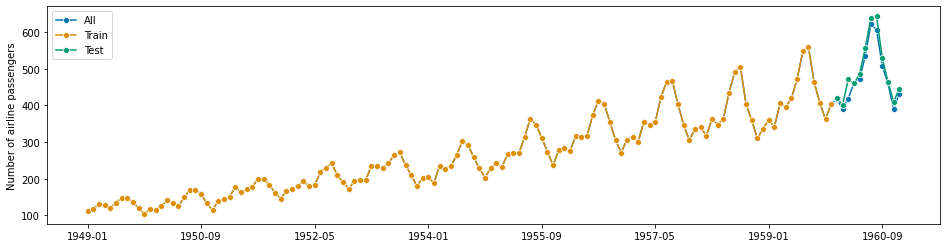

In [20]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = best_tuned_models.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])
round(smape_loss(y_test, y[y_test.index]), 4)

### Blend Best Models

#### Mean Blender

In [21]:
mean_blender = exp.blend_models(best_baseline_models, method='mean')

,mae,rmse,mape,smape
0,14.0494,315.4778,0.0353,0.0362
1,16.6968,352.2082,0.0458,0.0446
2,22.8498,622.8746,0.0540,0.0558
Mean,17.8653,430.1869,0.0450,0.0455
SD,3.6866,137.0734,0.0076,0.0080


0.0201

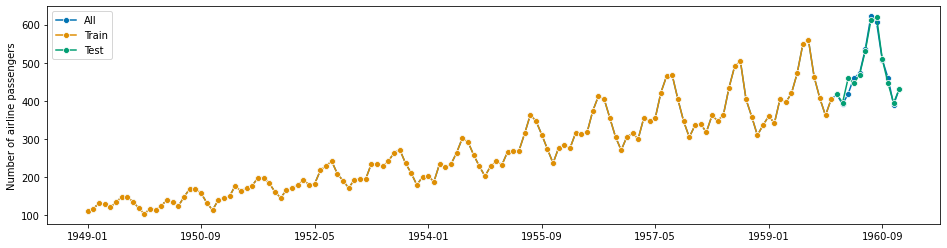

In [22]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = mean_blender.predict()
plot_series(y, y_train, y_test[0], labels=['All', 'Train', 'Test'])
round(smape_loss(y_test[0], y[y_test.index]), 4)

#### Median Blender

In [23]:
median_blender = exp.blend_models(best_baseline_models, method='median')

,mae,rmse,mape,smape
0,14.5587,352.4081,0.0366,0.0376
1,16.1878,343.8936,0.0440,0.0430
2,20.8867,548.8347,0.0495,0.0512
Mean,17.2111,415.0455,0.0434,0.0439
SD,2.6828,94.6671,0.0053,0.0056


0.0199

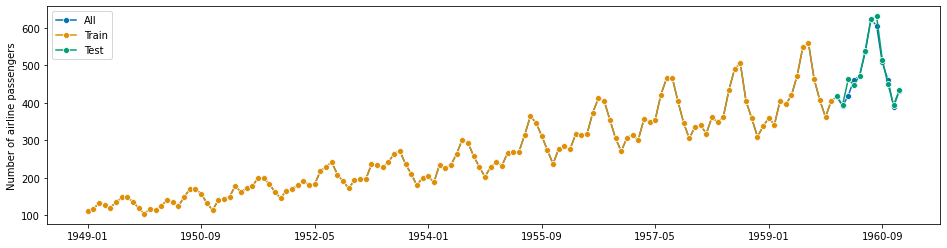

In [24]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = median_blender.predict()
plot_series(y, y_train, y_test, labels=['All', 'Train', 'Test'])
round(smape_loss(y_test, y[y_test.index]), 4)

#### Voting Blender

In [25]:
top_model_metrics = compare_metrics.iloc[0:3]['smape']
display(top_model_metrics)

top_model_weights = 1 - top_model_metrics/top_model_metrics.sum()
display(top_model_weights)

exp_smooth    0.0427
auto_ets      0.0445
arima         0.0507
Name: smape, dtype: float64

exp_smooth    0.690355
auto_ets      0.677302
arima         0.632342
Name: smape, dtype: float64

In [26]:
voting_blender = exp.blend_models(best_baseline_models, method='voting', weights=top_model_weights.values)

,mae,rmse,mape,smape
0,14.0757,317.2258,0.0354,0.0363
1,16.6660,351.5236,0.0457,0.0445
2,22.6969,616.9015,0.0536,0.0554
Mean,17.8129,428.5503,0.0449,0.0454
SD,3.6118,133.9184,0.0075,0.0078


0.02

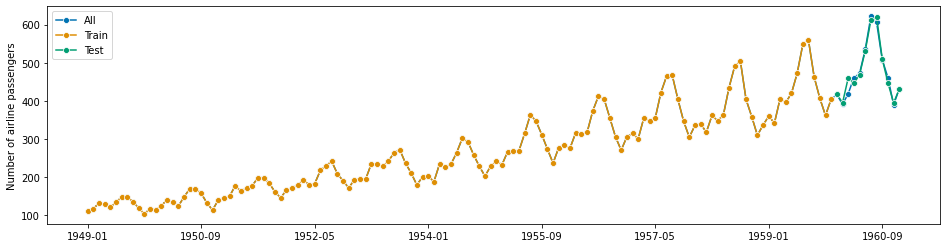

In [27]:
y_train = exp.get_config("y_train")
# Internally split Keep len(fh) as test set
y_test = voting_blender.predict()
plot_series(y, y_train, y_test[0], labels=['All', 'Train', 'Test'])
round(smape_loss(y_test[0], y[y_test.index]), 4)

## Types of Window Splitters

### Sliding Window Splitter

In [28]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='sliding')
model = exp.create_model("auto_ets")

,mae,rmse,mape,smape
0,14.5582,352.4071,0.0366,0.0376
1,16.5507,361.1652,0.0452,0.0441
2,35.6983,1532.8331,0.0808,0.0847
Mean,22.2691,748.8018,0.0542,0.0555
SD,9.5307,554.4054,0.0191,0.0208


### Expanding/Rolling Window

* They are identical

In [29]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='expanding')
model = exp.create_model("auto_ets")

,mae,rmse,mape,smape
0,14.5582,352.4071,0.0366,0.0376
1,16.8005,373.5136,0.0458,0.0447
2,20.8908,549.0481,0.0495,0.0512
Mean,17.4165,424.9896,0.0440,0.0445
SD,2.6217,88.1448,0.0054,0.0055


In [30]:
exp = TimeSeriesExperiment()
exp.setup(data=y, fh=fh, fold=fold, fold_strategy='rolling')
model = exp.create_model("auto_ets")

,mae,rmse,mape,smape
0,14.5582,352.4071,0.0366,0.0376
1,16.8005,373.5136,0.0458,0.0447
2,20.8908,549.0481,0.0495,0.0512
Mean,17.4165,424.9896,0.0440,0.0445
SD,2.6217,88.1448,0.0054,0.0055


## Error Handling

In [31]:
try:
    exp = TimeSeriesExperiment()
    exp.setup(data=y, fh=17, fold=76, fold_strategy='expanding')
except ValueError as error:
    print(error)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:04:09
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies


Not Enough Data Points, set a lower number of folds or fh
